## Data Visualization

In [25]:
# Matplotlib backend, artist

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
fig = Figure()
canvas = FigureCanvas(fig)

import numpy as np
x = np.random.randn(10000)

ax = fig.add_subplot(111)

ax.hist(x, 100)

ax.set_title("Normal distribution with $\mu=0, \sigma=1$")
fig.savefig("matplotlib_histogram.png")

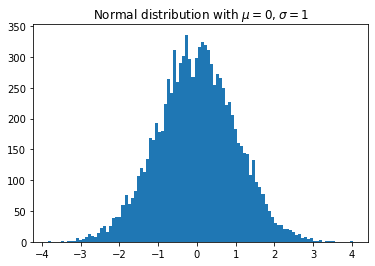

In [26]:
import matplotlib.pyplot as plt
import numpy as np
x = np.random.randn(10000)
plt.hist(x, 100)
plt.title(r'Normal distribution with $\mu=0, \sigma=1$')
plt.savefig("matplotlib_histogram.png")
plt.show()

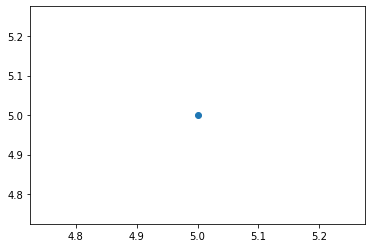

In [27]:
import matplotlib.pyplot as plt
plt.plot(5, 5, "o")
plt.show()

In [30]:
import numpy as np
import pandas as pd
from __future__ import print_function

df_can = pd.read_excel("./files/Canada.xlsx")


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.